In [1]:
import numpy as np
import matplotlib.pyplot as plt


#a
def create_matrix(e, n):
    A = np.zeros((n,n))
    for i in range(n):
        if i==0:
            A[0][0] = 1-e
            A[0][1] = e
        elif i==range(n)[-1]:
            A[-1][-1] = 1-e
            A[-1][-2] = e
        else:
            A[i][i-1] = e
            A[i][i] = 1-2*e
            A[i][i+1] = e
    return A


In [2]:

#b
A = create_matrix(0.23, 20)
f = np.array([193,485,664,763,804,805,779,736,684,626,566,508,452,400,351,308,268,233,202,173])
g = np.matmul(A,f)

g_mess = np.zeros(20)
for i in range(20):
    g_mess[i] = np.random.poisson(g[i])



In [3]:
print(g)
print(g_mess)

[ 260.16  459.01  645.6   749.66  794.8   798.79  775.09  733.93  682.62
  625.54  566.46  508.46  452.92  400.69  352.38  308.69  269.15  233.92
  202.46  179.67]
[ 278.  477.  663.  736.  788.  751.  757.  732.  666.  636.  561.  519.
  436.  392.  373.  297.  247.  249.  224.  195.]


In [4]:

#c
eigens = np.linalg.eig(A)
D = np.diag(eigens[0])
U = eigens[1]
U_inv = np.linalg.inv(eigens[1])

idx = np.argsort(-eigens[0])
D_sorted = np.diag(eigens[0][idx])
U_sorted = U[:, idx]
U_sorted_inv = np.linalg.inv(U_sorted)


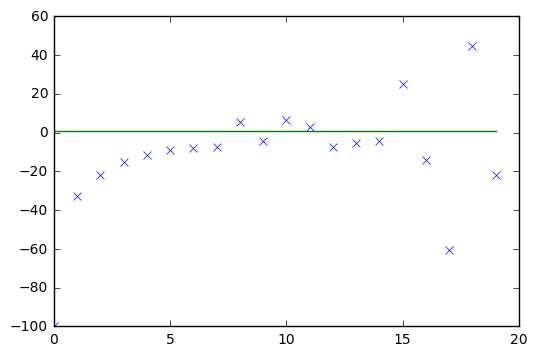

In [15]:

#d

b = np.matmul(U_sorted_inv, f)
c = np.matmul(U_sorted_inv, g)

V_f = np.diag(f) # Kovarianzmatrix wegen Poission
V_b = np.matmul( U_sorted_inv, np.matmul( V_f, np.transpose(U_sorted_inv) ) )

b_mess = np.matmul(np.linalg.inv(D_sorted), np.matmul(U_sorted_inv, g_mess))

b_mess_norm = b_mess/np.sqrt(np.diagonal(V_b))

plt.plot(range(20), b_mess_norm, 'x')
plt.plot(range(20), np.ones(20))
#plt.plot(range(20), b/np.diagonal(V_b), 'xr')
plt.show()


In [17]:
print(np.linalg.inv(D_sorted))

[[  1.           0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           1.00569562   0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.           1.02303256   0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.           0.           1.0527834    0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0. 

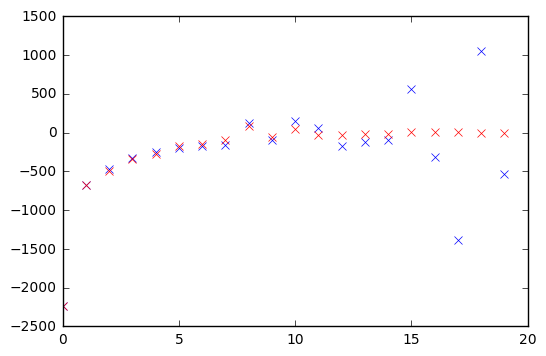

In [11]:
plt.clf()
plt.plot(range(20), b_mess, 'xb')
plt.plot(range(20), b, 'xr')
plt.show()


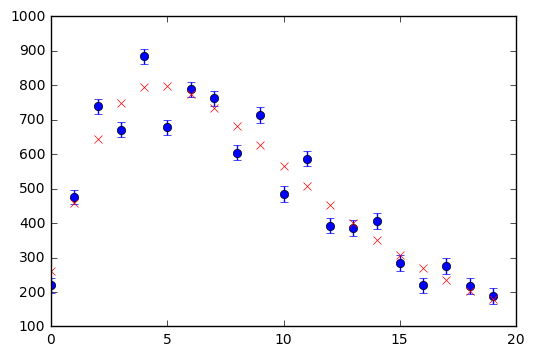

[ 22.36067977  20.56011838  21.36608639  21.85972408  22.07569765
  22.18447914  22.24575485  22.28684631  22.31504933  22.34132151
  22.36067977  22.38002129  22.4062173   22.43427024  22.47501704
  22.53550277  22.64207529  22.85065564  23.31287954  24.02668376]


In [7]:
plt.clf()
g_mess = np.matmul(U_sorted, b_mess)
plt.errorbar(range(20), g_mess, yerr=np.sqrt(np.diagonal(V_b)), fmt='o')
plt.plot(range(20), g, "xr")
plt.show()


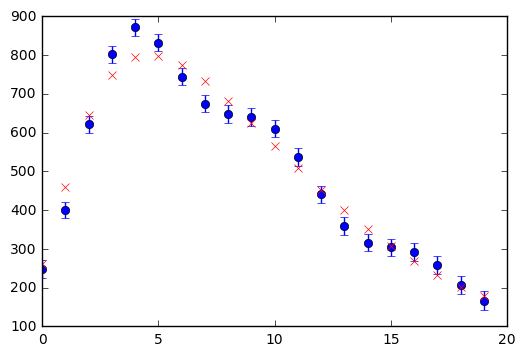

In [46]:
#e
cutoff = 7

D_sorted_reg = np.copy(D_sorted)
D_sorted_reg_inv = np.linalg.inv(D_sorted_reg)
for i in range(cutoff,20):
    D_sorted_reg_inv[i][i] = 0

b_mess_reg = np.matmul(D_sorted_reg_inv, np.matmul(U_sorted_inv, g_mess))

g_mess_reg = np.matmul(U_sorted, b_mess_reg)

plt.clf()
g_mess = np.matmul(U_sorted, b_mess)
plt.errorbar(range(20), g_mess_reg, yerr=np.sqrt(np.diagonal(V_b)), fmt='o')
plt.plot(range(20), g, "xr")
plt.show()
